# Проект: Обучение с учителем: качество модели




**Описание проекта** 

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


**Описание данных**

*market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


*market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


*market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.


*money.csv

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**Ход исследования проекта:**
- [Загрузка и изучение данных](#section_id): общая информация о датасетах, опредение соответствуют ли данные описанию задачи и стандартам оформления данных. 
- [Предобработка данных](#section_id1): обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- [Исследовательский анализ данных](#section_id2): статистический анализ всех признаков, графики для каждого признака, их распределения, зависимости, а также выявление аномалий.
- [Объединение таблиц](#section_id3): создание расширенного датасета для дальнейшего анализа и подготовки к обучению моделей.
- [Корреляционный анализ](#section_id4): проведение корреляционного анализа признаков в количественной шкале в итоговой таблице для моделирования, выводы о наличии или об отсутствии мультиколлинеарности.
- [Использование пайплайнов](#section_id5): создание пайплайнов для подготовки данных, обучение разных моделей, выбор лучшей.
- [Анализ важности признаков](#section_id6): оценка важности признаков для лучшей модели, график важности с помощью метода SHAP. 
- [Сегментация покупателей](#section_id7): сегментация покупателей, спользование результатов моделирования и данных о прибыльности покупателей, предложение как увеличить её покупательскую активность выбранной группы.
- [Общий вывод](#section_id8): что сделали для поиска лучшей модели, как она может помочь бизнесу, рекомендации для увеличения продаж.

<a id='section_id'></a>
## Загрузка и изучение данных 

Импортируем необходимые библиотеки. Далее выведем общую информацию о датасете, посмотрим первые пять строк для понимания структуры данных.

In [189]:
!pip install -Uq scikit-learn

In [190]:
import sklearn
sklearn.__version__

'1.6.1'

In [191]:
pip install missingno -q

Note: you may need to restart the kernel to use updated packages.


In [192]:
!pip install phik -q

In [193]:
!pip install shap -q

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as msno
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error, 
    accuracy_score, confusion_matrix, recall_score, 
    precision_score, roc_auc_score 
)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from phik.report import correlation_report, plot_correlation_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV

import shap

import warnings
warnings.filterwarnings('ignore')

In [195]:
pd.set_option('display.max_columns', None)

Загрузим датасеты.

In [196]:
#Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
market = pd.read_csv('/datasets/market_file.csv')

In [197]:
#Таблица с данными о выручке, которую получает магазин с покупателя.
money = pd.read_csv('/datasets/market_money.csv')

In [198]:
#Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
time = pd.read_csv('/datasets/market_time.csv')

In [199]:
#Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца с каждого клиента.
money_3month = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

Изучим общую информацию и выведем первые пять строк для каждого датасета.

**Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.**

In [200]:
market.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


При выводе первых пяти строк датасета увидели структуру данных, обратили внимание на то, что названия столбцов требуют приведения к общепринятым стандартам.

In [201]:
#применим comprehension лист для переименования всех столбцов 
market.columns=[col.lower().replace(' ', '_') for col in market.columns]

In [202]:
#проверим список названий столбцов
market.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

**Данные о выручке, которую получает магазин с покупателя.**

In [203]:
money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [204]:
#применим comprehension лист для переименования всех столбцов 
money.columns=[col.lower() for col in money.columns]

In [205]:
#проверим список названий столбцов
money.columns

Index(['id', 'период', 'выручка'], dtype='object')

**Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

In [206]:
time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [207]:
#применим comprehension лист для переименования всех столбцов 
time.columns=[col.lower() for col in time.columns]

In [208]:
#проверим список названий столбцов
time.columns

Index(['id', 'период', 'минут'], dtype='object')

**Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца с каждого клиента.**

In [209]:
money_3month.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [210]:
#применим comprehension лист для переименования всех столбцов 
money_3month.columns=[col.lower() for col in money_3month.columns]

In [211]:
#проверим список названий столбцов
money_3month.columns

Index(['id', 'прибыль'], dtype='object')

**Промежуточный вывод**

Загрузили четыре датасета, необходимых для построения модели машинного обучения. Посмотрели на структуру данных, привели названия столбцов к общепринятому виду. 

<a id='section_id1'></a>
## Предобработка данных

Создадим функцию для вывода общей информации, пропусках, дубликатах.

In [212]:
def general_info(x):
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    x.info()
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(x.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    print('')
    print('')
    display(x.duplicated().sum())
    print('------------- Визуализация пропусков -------------')
    print('')
    print('')
    msno.bar(x);

**Предобработка датасета о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении**

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал  

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




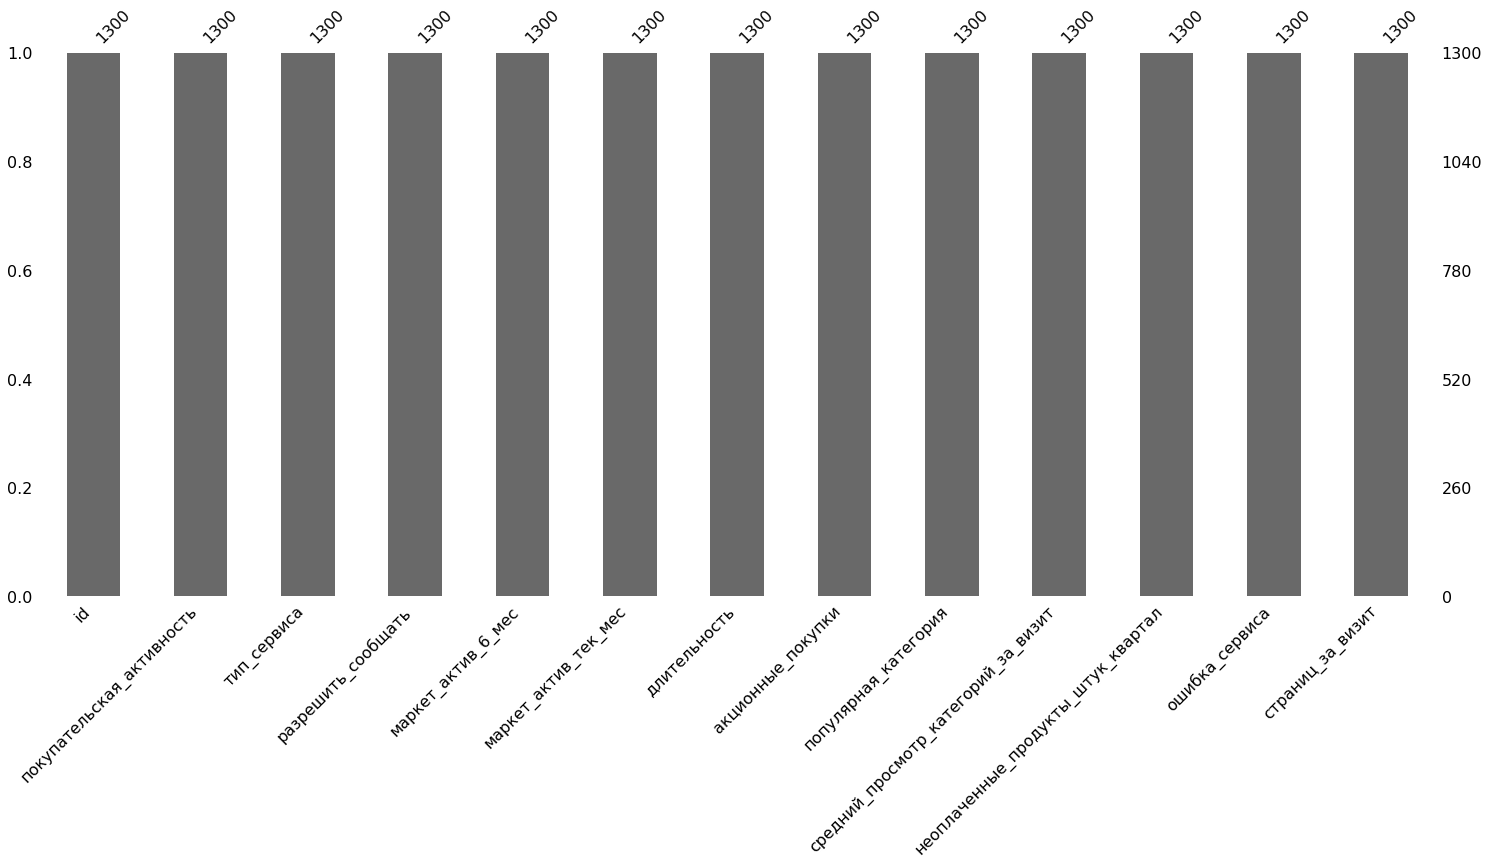

In [213]:
general_info(market)

В данных нет пропусков, дубликатов, типы данных соответсвуют задаче.

**Данные о выручке, которую получает магазин с покупателя.**

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
------------- Количество пустых значений в датафрейме -------------




id         0
период     0
выручка    0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




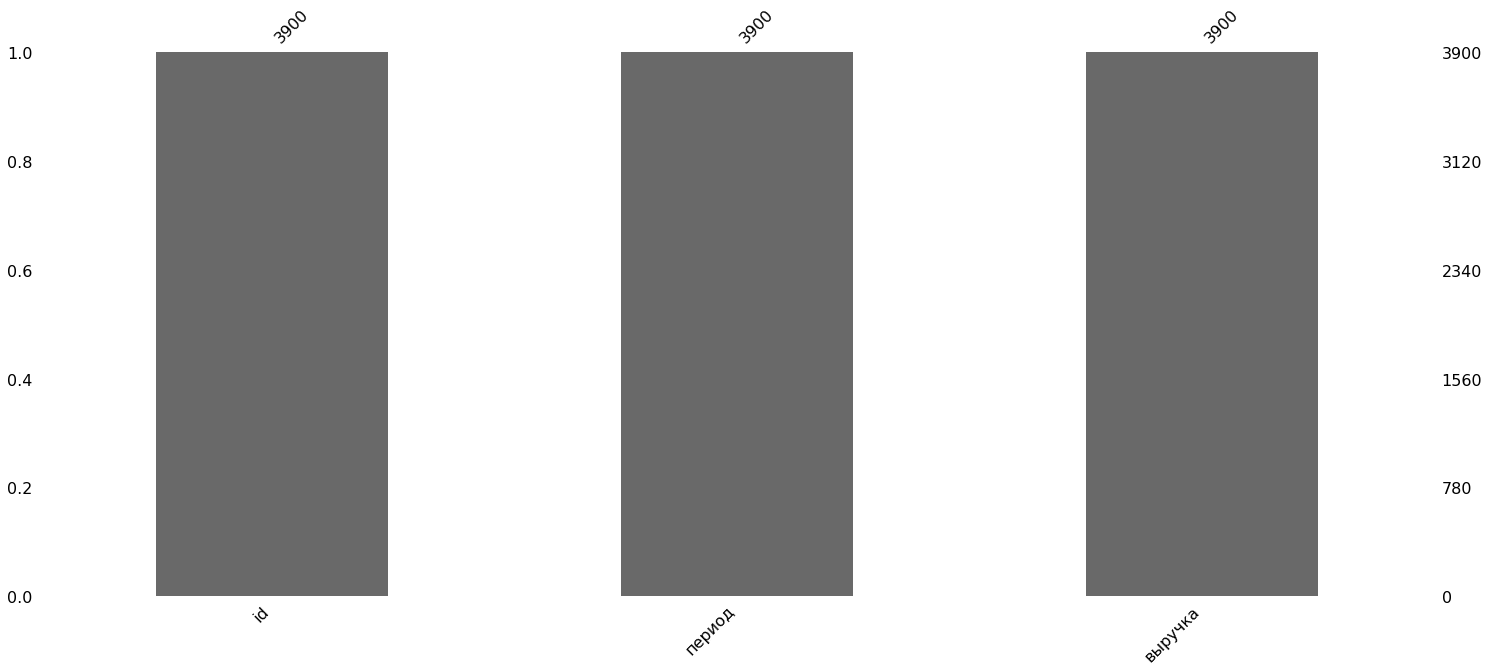

In [214]:
general_info(money)

В данных нет пропусков, дубликатов, типы данных соответсвуют задаче.

**Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
------------- Количество пустых значений в датафрейме -------------




id        0
период    0
минут     0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




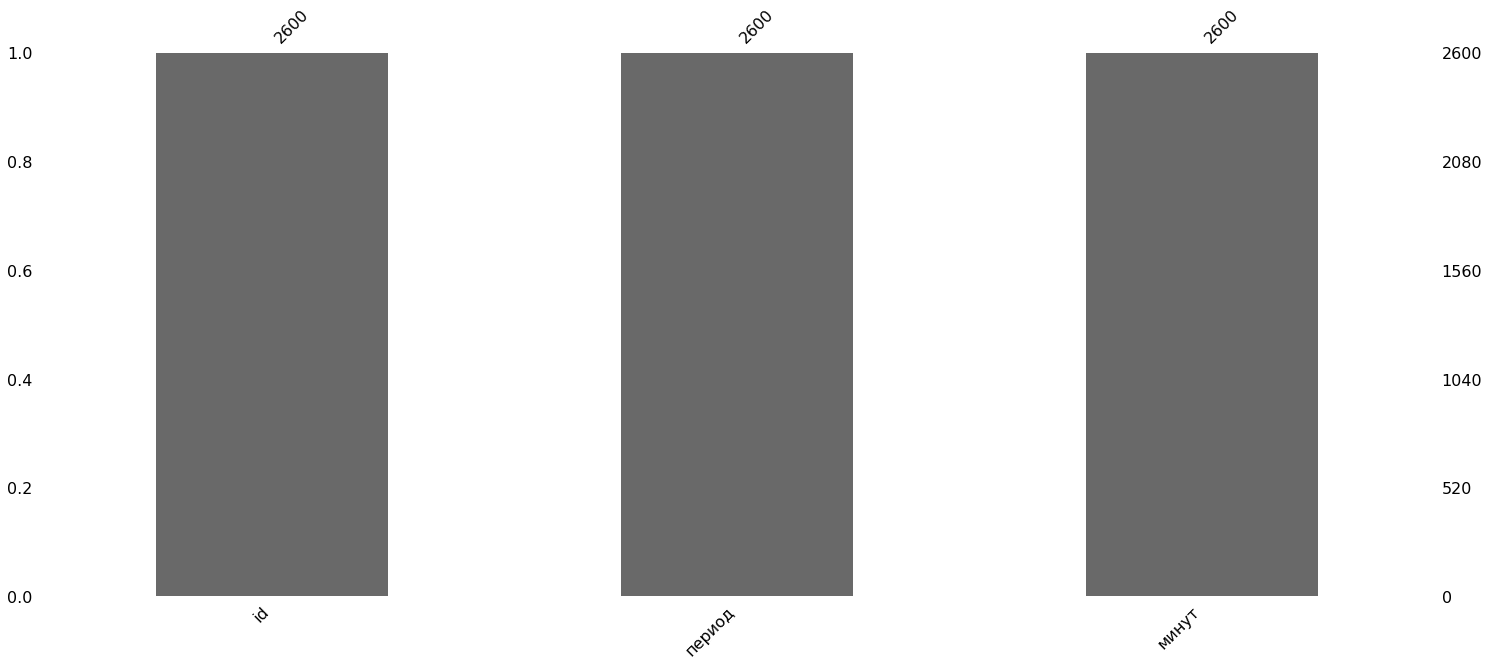

In [215]:
general_info(time)

В данных нет пропусков, дубликатов, типы данных соответсвуют задаче.

**Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца с каждого клиента.**

------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
------------- Количество пустых значений в датафрейме -------------




id         0
прибыль    0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------




0

------------- Визуализация пропусков -------------




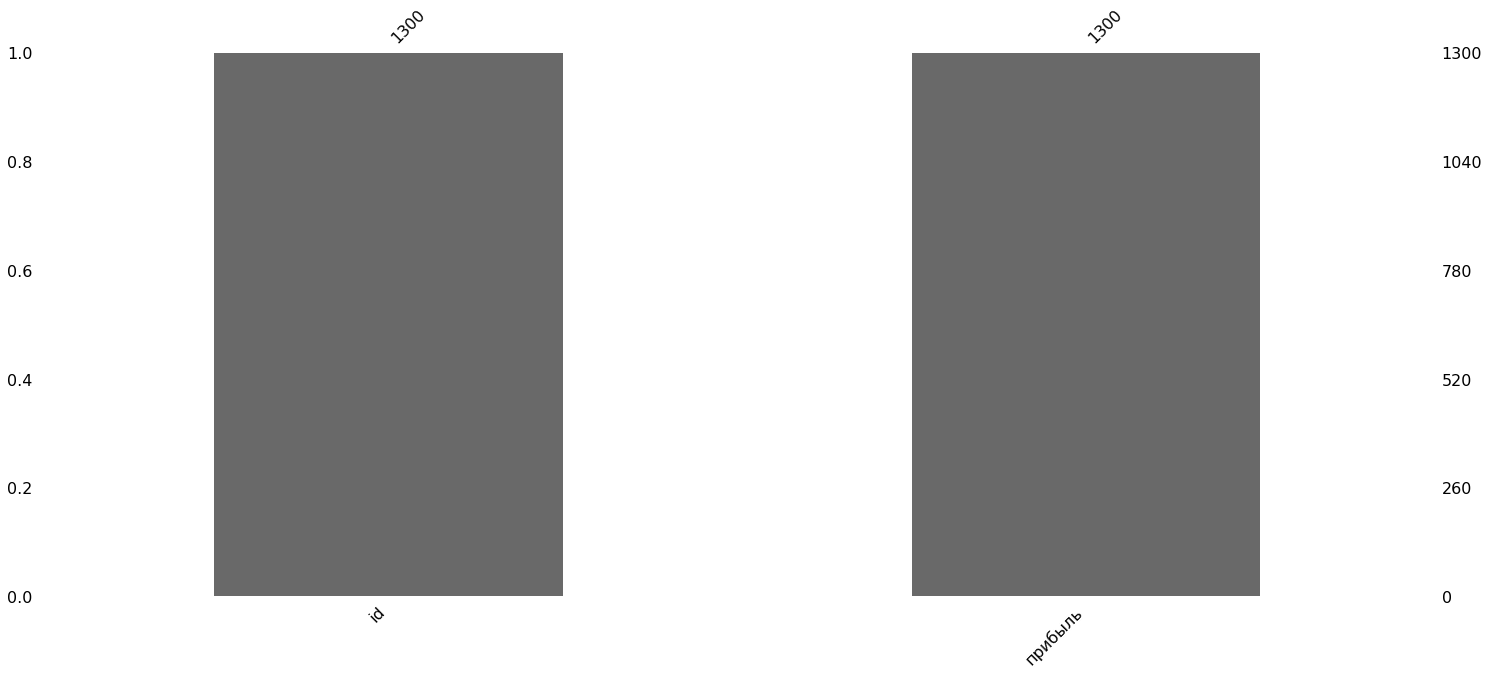

In [216]:
general_info(money_3month)

В данных нет пропусков, дубликатов, типы данных соответсвуют задаче.

Создадим функцию для проверки неявных дубликатов.

In [217]:
def duplicates(data):
    cat_features = data.select_dtypes(include=['object']).columns
    for i in cat_features:
        print(f'Уникальные значения в столбце {i}: ', data[i].unique())

**Данные о поведении покупателя на сайте**

In [218]:
duplicates(market)


Уникальные значения в столбце покупательская_активность:  ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце тип_сервиса:  ['премиум' 'стандартт' 'стандарт']
Уникальные значения в столбце разрешить_сообщать:  ['да' 'нет']
Уникальные значения в столбце популярная_категория:  ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Видим, что в уникальных значениях переменных есть неявные дубликаты. Устраним неявные дубликаты в столбце тип_сервиса ('стандартт' 'стандарт')

In [219]:
market['тип_сервиса'] = (market['тип_сервиса'].replace(['стандартт'], 'стандарт', regex=True))

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Убедимся, что замена прошла корректно.

In [220]:
duplicates(market)

Уникальные значения в столбце покупательская_активность:  ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце тип_сервиса:  ['премиум' 'стандарт']
Уникальные значения в столбце разрешить_сообщать:  ['да' 'нет']
Уникальные значения в столбце популярная_категория:  ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


**Данные о выручке, которую получает магазин с покупателя**

In [221]:
duplicates(money)

Уникальные значения в столбце период:  ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


В данных дубликатов нет.

**Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

In [222]:
duplicates(time)

Уникальные значения в столбце период:  ['текущий_месяц' 'предыдцщий_месяц']


Исправим значение 'предыдцщий_месяц' на 'предыдущий_месяц'.

In [223]:
time['период'] = (time['период'].replace(['предыдцщий_месяц'], 'предыдущий_месяц', regex=True))

Убедимся, что замена прошла корректно.

In [224]:
duplicates(time)

Уникальные значения в столбце период:  ['текущий_месяц' 'предыдущий_месяц']


**Промежуточный вывод**

Изучена общая информация о каждом датасете, проверены пропуски и дубликаты.  Провели обработку всех неявных дубликатов, привели названия к идентичным названиям.

<a id='section_id2'></a>
## Исследовательский анализ данных

Создадим функцию для исследовательского анализа трех датасетов.

In [225]:
def eda(data):
    print('------------- Описательная статистика для числовых данных -------------')
    display(data.describe().T)
    print('')
    print('')
    print('------------- Описательная статитстика для категориальных данных -------------')
    try:
        display(data.describe(include='object').T)
    except:
        print('В данных нет категориальных признаков')
    print('')
    print('')
    print('------------- Гистограммы для числовых признаков -------------')
    try:
        numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
        numeric_features.remove('id')
    except:
        numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
    for i in numeric_features:
        plt.hist(data[i], bins=100)
        plt.grid(True) 
        plt.title(f'Распредение {i}', loc = 'left') 
        plt.xlabel(f'{i}') 
        plt.ylabel('Частота') 
        plt.xticks(rotation=45)
        plt.show()
    print('')
    print('')
    print('------------- Распределения категориальных признаков -------------')
    cat_features = data.select_dtypes(include=['object']).columns
    for i in cat_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=i)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

**Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении**

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
покупательская_активность,1300,2,Прежний уровень,802
тип_сервиса,1300,2,стандарт,924
разрешить_сообщать,1300,2,да,962
популярная_категория,1300,6,Товары для детей,330




------------- Гистограммы для числовых признаков -------------


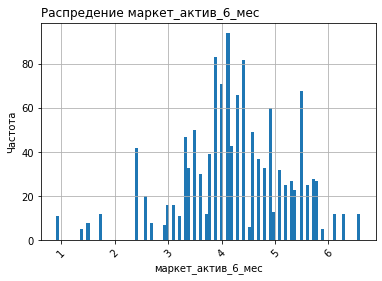

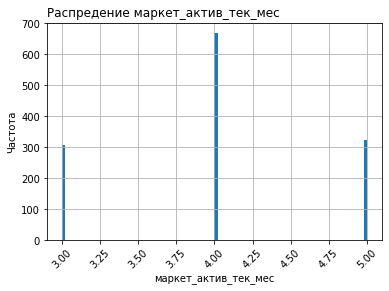

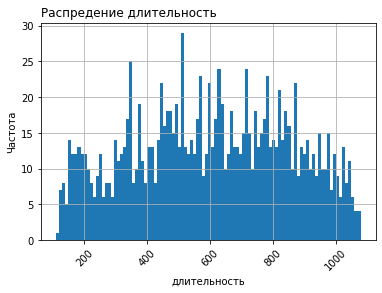

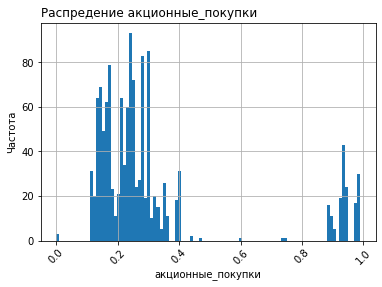

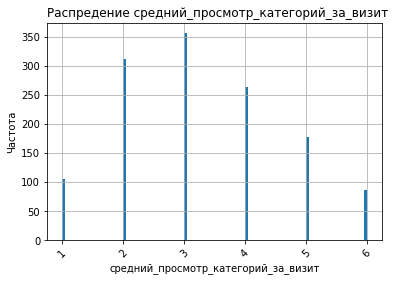

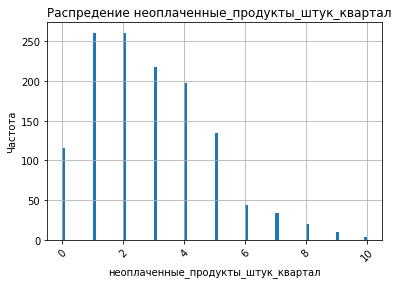

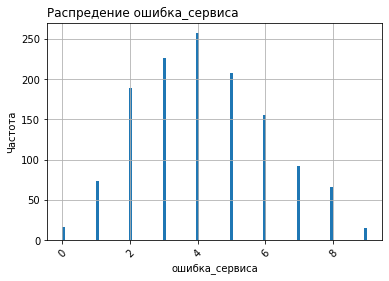

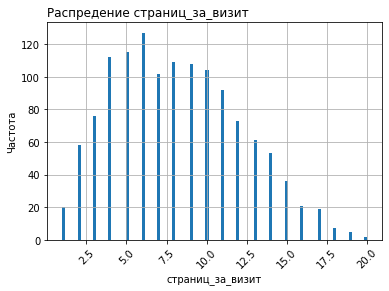



------------- Распределения категориальных признаков -------------


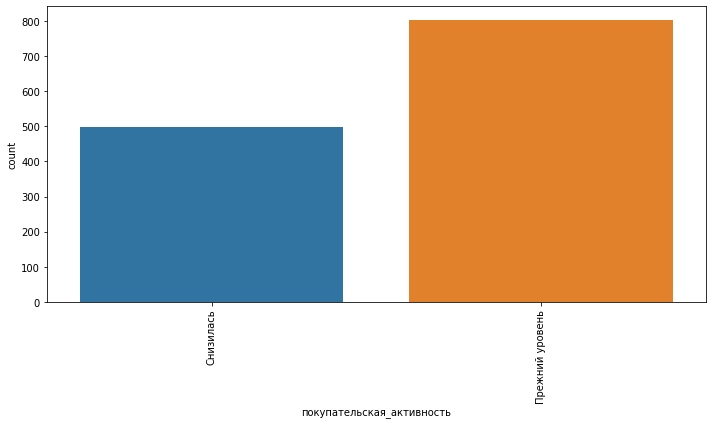

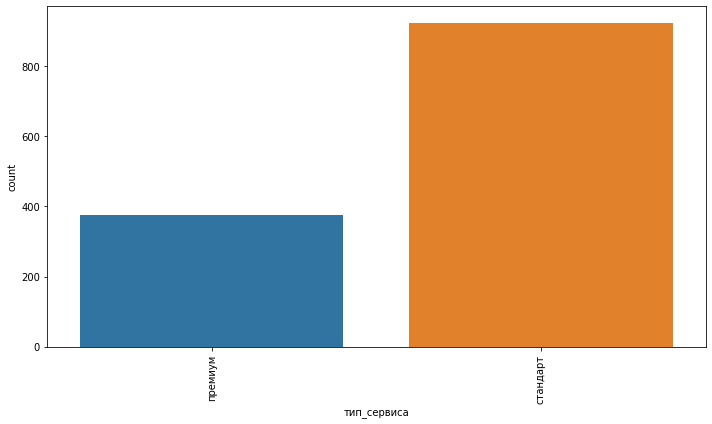

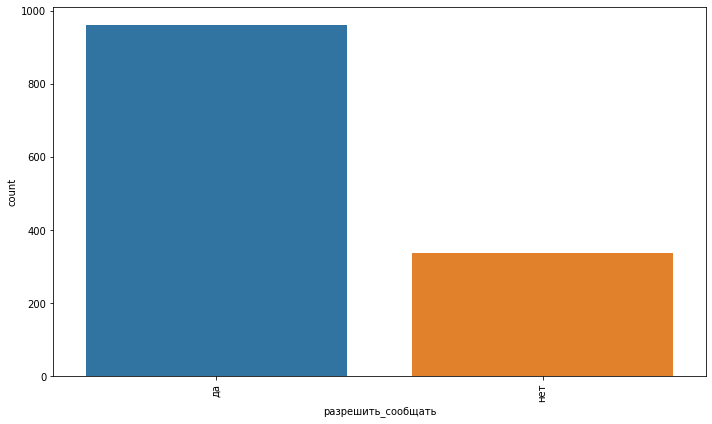

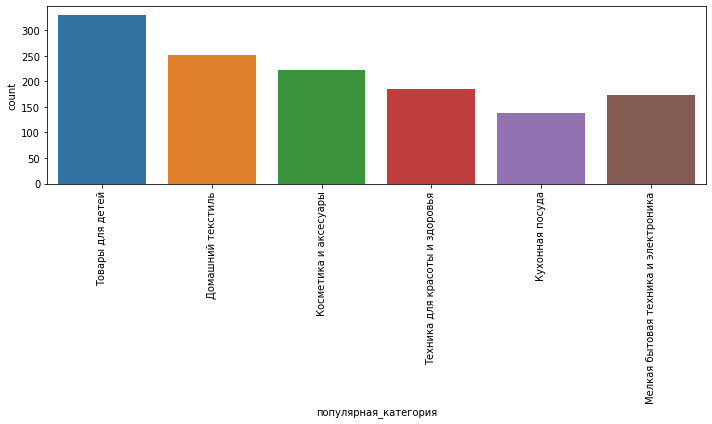

In [226]:
eda(market)

При выводе описательной статистики и изучения визуализаций увидели, что в данных нет аномальных значений. Заметили, что есть группа клиентов, с коротыми было не очень много маркетинговых коммуникаций за последние 6 месяцев (менее трех). В основном было от 3 до 6 коммуникаций. За текущий месяц было стабильно 3, 4 или 5 коммуникаций. Длительность пользования клиентами сервиса распределена практически нормально, также заметно, что данные можно дискретизировать. Акционные покупки можно разделить на несколько категорий, но основная масса была в промежутке 0.1-0.4. Средний просмотр также явно распределяется в несколько категорий, доминирует 3 просмотра. Похожая картина и с неоплаченными продуктами в корзине. Доминирует значение 1. Ошибки сервиса распределены нормально, преобладает 4 ошибки. Просмотр страниц за визит - нормальное распределение, доминирует 6 страниц. При изучении категориальных признаков заметили, что основная масса не снижает покупательную активность, но тем не менее видим, что у многих она снизилась. Преобладает тип сервиса стандарт. Больше клиентов дают согласие на рассылку. В данных преобладает категория товаров для детей и домашний текстиль.

**Данные о выручке, которую получает магазин с покупателя**

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
период,3900,3,предыдущий_месяц,1300




------------- Гистограммы для числовых признаков -------------


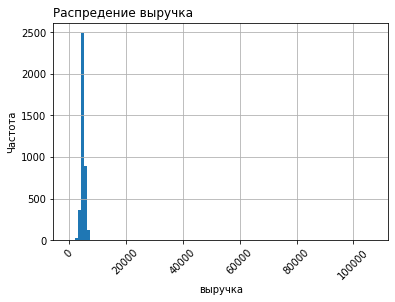



------------- Распределения категориальных признаков -------------


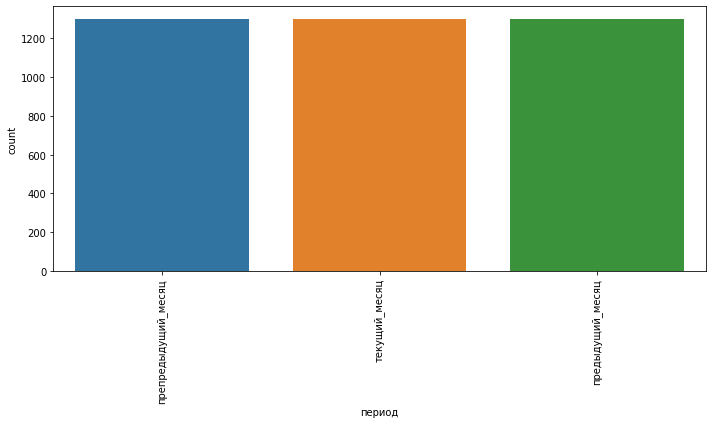

In [227]:
eda(money)

В данных о выручке видим, что есть выбросы.
Построим отдельно ящик с усами.

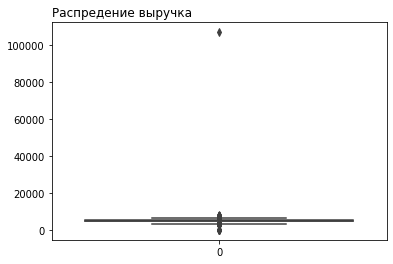

In [228]:
sns.boxplot(data=money['выручка'])
plt.title('Распредение выручка', loc = 'left');

Отфильтруем данные по выбросу.

In [229]:
money[money['выручка'] > 20000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


Видим, что это всего одна строка. Но пока не будем ее удалять или менять. Мы снова вернемся к этому выбросу, когда объединим данные. 

Проверим еще раз распределение по выручке без учета выброса (сделаем xlim)

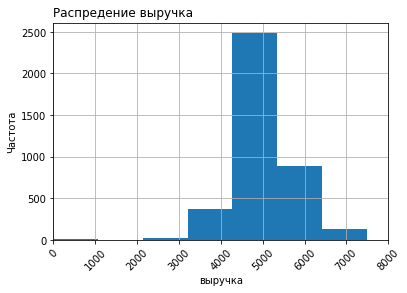

In [230]:
plt.hist(money['выручка'] , bins=100)
plt.grid(True) 
plt.title('Распредение выручка', loc = 'left') 
plt.xlim(0, 8000) #значения не более 8000
plt.xlabel('выручка') 
plt.ylabel('Частота') 
plt.xticks(rotation=45)
plt.show()

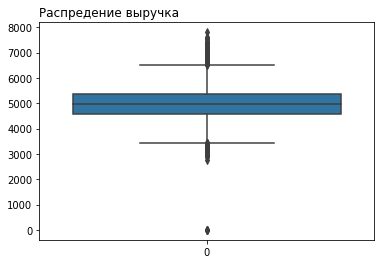

In [231]:
sns.boxplot(data=money.query('выручка < 8000')['выручка'])
plt.title('Распредение выручка', loc = 'left');

In [232]:
money.query('выручка < 8000')['выручка'].describe()

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64

После фильтрации данных по аномальному значению видим, что выручка распределилась практически нормально, но тем не менее есть клиенты, которые ничего не покупают. С этой группой стоит отдельно поработать.

In [233]:
money[money['выручка'] == 0]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Таких клиентов всего три человека. Оставим эти данные для изучения. Такие клиенты требуют дополнительного анализа.

Проверим еще раз распределение по выручке, отфильтровав данные. 

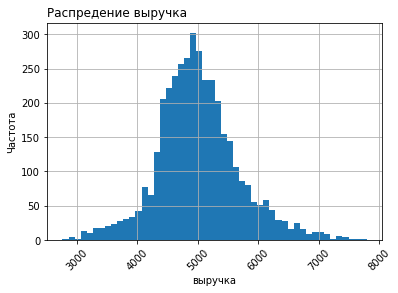

In [234]:
plt.hist(money.query('0 < выручка < 8000')['выручка'] , bins=50)
plt.grid(True) 
plt.title('Распредение выручка', loc = 'left') 
plt.xlabel('выручка') 
plt.ylabel('Частота') 
plt.xticks(rotation=45)
plt.show()

Видим, что выручка без учета выбросов распределена нормально.В данных есть выбросы, но мы их не удаляем на данном этапе.

**Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
период,2600,2,предыдущий_месяц,1300




------------- Гистограммы для числовых признаков -------------


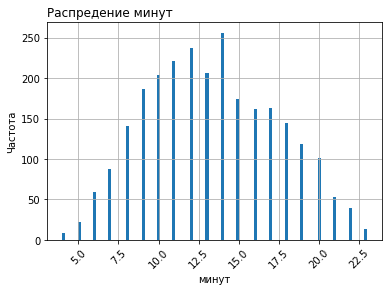



------------- Распределения категориальных признаков -------------


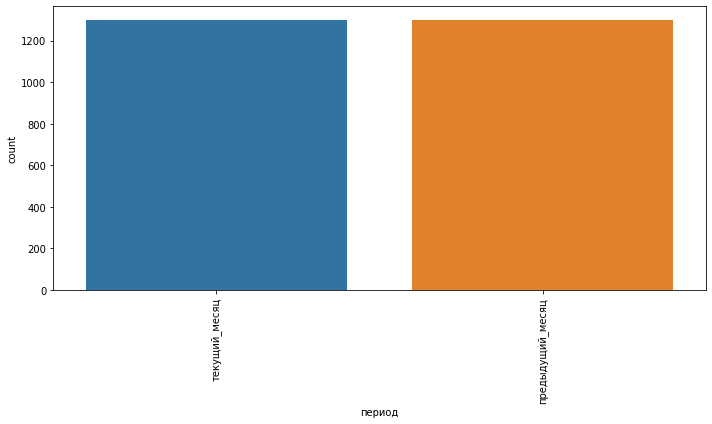

In [235]:
eda(time)

По графикам видим, что в среднем покупатели проводят по 13 минут на сайте, данные равномерно распределены между двумя месяцами. Аномалий не выявлено.

**Данные о среднемесячной прибыли продавца за последние 3 месяца**

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43




------------- Описательная статитстика для категориальных данных -------------
В данных нет категориальных признаков


------------- Гистограммы для числовых признаков -------------


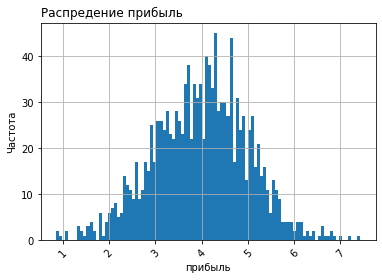



------------- Распределения категориальных признаков -------------


In [236]:
eda(money_3month)

Прибыль распределена нормально. Аномалий не выявлено.

**Промежуточный вывод**

Проведен исследовательский анализ каждого из представленных датасетов, изучена описательная статистика, гистограммы распределений числовых и категориальных переменных.

Убедились, что в данных о поведении покупателей нет аномальных значений. Заметили, что есть группа клиентов, с коротыми было не очень много маркетинговых коммуникаций за последние 6 месяцев (менее трех). В основном было от 3 до 6 коммуникаций. За текущий месяц было стабильно 3, 4 или 5 коммуникаций. Длительность пользования клиентами сервиса распределена практически нормально, также заметно, что данные можно дискретизировать. Акционные покупки можно разделить на несколько категорий, но основная масса была в промежутке 0.1-0.4. Средний просмотр также явно распределяется в несколько категорий, доминирует 3 просмотра. Похожая картина и с неоплаченными продуктами в корзине. Доминирует значение 1. Ошибки сервиса распределены нормально, преобладает 4 ошибки. Просмотр страниц за визит - нормальное распределение, доминирует 6 страниц. При изучении категориальных признаков заметили, что основная масса не снижает покупательную активность, но тем не менее видим, что у многих она снизилась. Преобладает тип сервиса стандар. Больше клиентов дают согласие на рассылку. В данных преобладает категория товаров для детей и домашний текстиль.

Увидели, что в данных по выручке есть аномальные значения, одна из строк с очень большой выручкой, и несколько строк по одним и тем же клиентам с нулевой выручкой. Решено на данном этапе эти данные не удалять, чтобы посмотреть, что будет после объединения таблиц.

В данных по времени не сайте и прибыли компании аномалий не обнаружено.


<a id='section_id3'></a>
## Объединение таблиц

Объединим таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании нам не понадобятся. 

Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. Сделаем отдельный столбец для каждого периода.

Применим метод pivot_table, чтобы сделать сводную таблицу и вывести отдельный столбец для каждого периода.

In [237]:
money_pivot = pd.pivot_table(money, index='id', values='выручка', columns='период', aggfunc=np.sum).reset_index()
money_pivot.columns = ['id', 'выручка_пред_мес', 'выручка_препред_мес','выручка_тек_мес']
money_pivot.head()

,id,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


Изменим порядок столбцов, чтобы они были в хронологическом порядке.

In [238]:
money_pivot = money_pivot[['id', 'выручка_препред_мес', 'выручка_пред_мес', 'выручка_тек_мес']]
money_pivot.head()

,id,выручка_препред_мес,выручка_пред_мес,выручка_тек_мес
0,215348,0.0,0.0,3293.1
1,215349,4472.0,5216.0,4971.6
2,215350,4826.0,5457.5,5058.4
3,215351,4793.0,6158.0,6610.4
4,215352,4594.0,5807.5,5872.5


Проделаем то же самое для таблицы с временем.

In [239]:
time_pivot = pd.pivot_table(time, index='id', values='минут', columns='период', aggfunc=np.sum).reset_index()
time_pivot.columns = ['id','время_пред_мес', 'время_тек_мес']
time_pivot.head()

,id,время_пред_мес,время_тек_мес
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


Объединим таблицы по колонке id. Перед объединением, проверим размер таблиц и количество уникальных id.

In [240]:
market.shape

(1300, 13)

In [241]:
market['id'].nunique()

1300

In [242]:
money_pivot.shape

(1300, 4)

In [243]:
money_pivot['id'].nunique()

1300

In [244]:
time_pivot.shape

(1300, 3)

In [245]:
time_pivot['id'].nunique()

1300

Убедились, что количество строк и количество уникальных значений id везде одинаково. Можно приступать к объединению таблиц. Затем проверим размер итоговой таблицы.

In [246]:
data = market.merge(money_pivot, on='id')

In [247]:
data = data.merge(time_pivot, on='id')

Проверим итоговую таблицу.

In [248]:
data.shape

(1300, 18)

In [249]:
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_мес,выручка_пред_мес,выручка_тек_мес,время_пред_мес,время_тек_мес
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11


**Промежуточный вывод**

Для подготовки данных для обучения моделей объединили три датасета в единый, предварительно обработав датасеты о выручке и времени на сайте по каждому клиенту. Перед и после объединения проверили размер датасетов, чтобы убедиться, что все отработало корректно.

<a id='section_id4'></a>
## Корреляционный анализ

Изучим взаимосвязь между признаками в итоговом датасете, рассчитаем коэффициенты корреляции между всеми признаками.

In [250]:
# phik корреляция
interval_cols = data.select_dtypes('number').columns.tolist()
interval_cols.remove('id')

In [251]:
interval_cols

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_препред_мес',
 'выручка_пред_мес',
 'выручка_тек_мес',
 'время_пред_мес',
 'время_тек_мес']

In [252]:
phik_overview = data.phik_matrix(interval_cols=interval_cols)

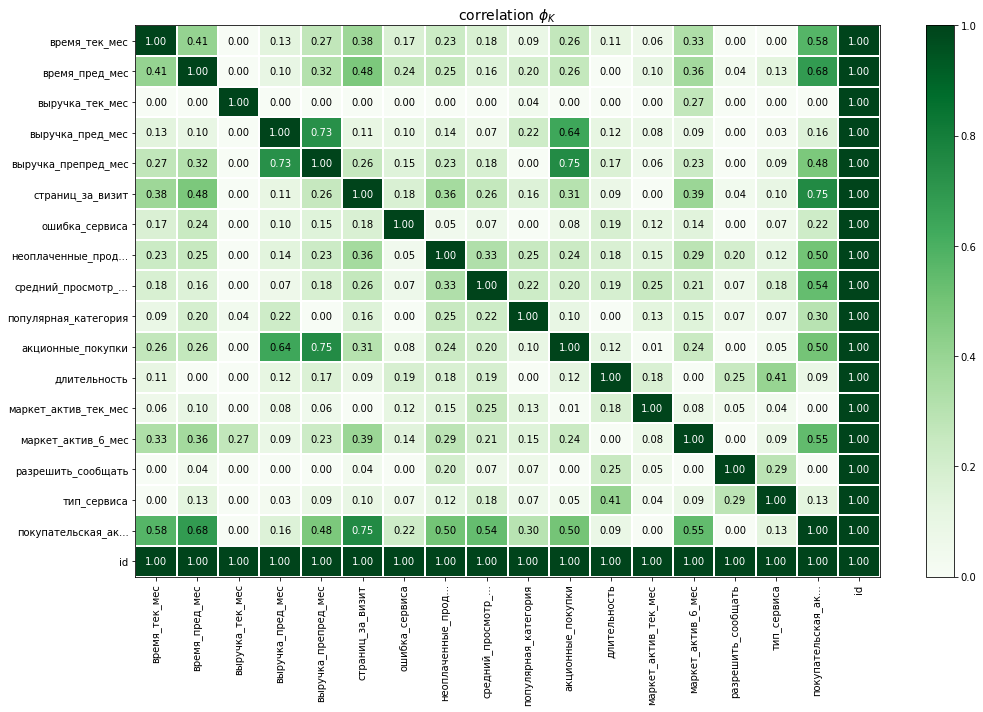

In [253]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(15, 10))

**Промежуточный вывод**

Построили матрицу корреляций признаков, из которой увидели, что больше всего коррелируют между собой выручка пред_месяц и выручка предпред_месяц, выручка предпред_мес и акционные покупки (что логично, при акциях люди больше покупают, и по всей видимости акции как раз проводились в предпред.месяц), покупательская активность и кол-во страниц за визит. Но поскольку о мультиколлинеарности говорят при значении коэффициента по модулю от 0.9 до 0.95, то в нашем случае коэффициентов корреляции выше 0.9 не наблюдается. Но для себя в уме запомним эту информацию. Она нам может помочь при Data Engineering.

Целевая переменная - это покупательская активность. Больше всего с ней коррелирует время на сайте и кол-во страниц за визит и абсолютно не коррелирует выручка за текущий месяц (что странно), маркетинговая активность и данные о разрешении присылать сообщения об акциях. Но пока не будем отбрасывать признаки, которые имеют 0 корреляцию. Мы изучим позже вклад каждого признака для прогноза. Помимо корреляции видим, что в данных нет утечки информации, поскольку нет ни одного входящего признака, имеющего значение корреляции по модулю равное 1 с целевой переменной.


<a id='section_id5'></a>
## Использование пайплайнов

Перед разбивкой данных на входящие признаки и целевую переменную снова проведем исследовательский анализ всего датасета и изучим данные по клиенту, по которому был выброс по выручке. Это был клиент с id 215380.

In [254]:
data[data['id'] == 215380]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_мес,выручка_пред_мес,выручка_тек_мес,время_пред_мес,время_тек_мес
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,5051.0,6077.0,106862.2,12,14


Мы видим, что для этого клиента активность снизилась, но выручка за текущий месяц многократно возросла. Явная ошибка в данных. Поэтому принимаем решение заменить это аномальное значение медианным. 

In [255]:
data.loc[32, 'выручка_тек_мес'] = data['выручка_тек_мес'].median()

In [256]:
data[data['id'] == 215380]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_мес,выручка_пред_мес,выручка_тек_мес,время_пред_мес,время_тек_мес
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,5051.0,6077.0,5179.95,12,14


Проверим еще одно наблюдение. Отфильтруемм данные по убыванию выручки. Если покупательская способность снижается, то по идее и выручка снижается.

In [257]:
data.query('выручка_препред_мес > выручка_пред_мес & выручка_пред_мес > выручка_тек_мес')['покупательская_активность'].value_counts()

Прежний уровень    162
Снизилась           41
Name: покупательская_активность, dtype: int64

Отфильтруем теперь по росту выручки.

In [258]:
data.query('выручка_препред_мес < выручка_пред_мес & выручка_пред_мес < выручка_тек_мес')['покупательская_активность'].value_counts()

Прежний уровень    308
Снизилась          268
Name: покупательская_активность, dtype: int64

Видим странную закономерность. Выручка растет, а 268 клиентам присвоен класс прежнего уровня покупательской активности. По всей видимости в компании покупательская активность оценивается по другим критериям.

Перед разделением данных на целевую переменную и входящие признаки, произведем с помощью ранее написанной функции исследовательский анализ.

Удалим данные, где выручка равно 0. Отфильтруем эти данные перед удалением.

In [259]:
data.query('выручка_препред_мес == 0 & выручка_пред_мес == 0')

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_мес,выручка_пред_мес,выручка_тек_мес,время_пред_мес,время_тек_мес
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
9,215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5,0.0,0.0,5986.3,12,6
11,215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2,0.0,0.0,4735.0,13,11


Всего три клиента с такими данными. 

In [260]:
data = data.query('выручка_препред_мес != 0 & выручка_пред_мес != 0')

------------- Описательная статистика для числовых данных -------------


,count,mean,std,min,25%,50%,75%,max
id,1297.0,215998.986893,374.578554,215349.00,215675.00,215999.00,216323.0,216647.00
маркет_актив_6_мес,1297.0,4.254433,1.015618,0.90,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1297.0,4.009252,0.696048,3.00,4.00,4.00,4.0,5.00
длительность,1297.0,602.993832,249.101456,121.00,410.00,607.00,806.0,1079.00
акционные_покупки,1297.0,0.320547,0.249657,0.11,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1297.0,3.267540,1.354623,1.00,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1297.0,2.841172,1.973451,0.00,1.00,3.00,4.0,10.00
ошибка_сервиса,1297.0,4.184271,1.950973,0.00,3.00,4.00,6.0,9.00
страниц_за_визит,1297.0,8.186584,3.977061,1.00,5.00,8.00,11.0,20.00
выручка_препред_мес,1297.0,4836.367772,333.438742,4098.00,4585.00,4812.00,5055.0,5663.00




------------- Описательная статитстика для категориальных данных -------------


,count,unique,top,freq
покупательская_активность,1297,2,Прежний уровень,802
тип_сервиса,1297,2,стандарт,922
разрешить_сообщать,1297,2,да,959
популярная_категория,1297,6,Товары для детей,329




------------- Гистограммы для числовых признаков -------------


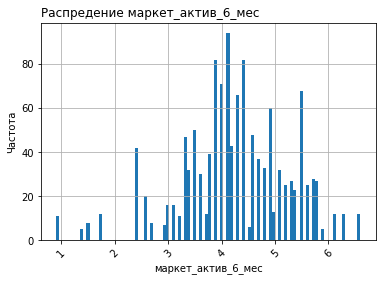

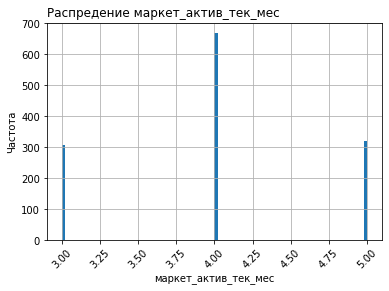

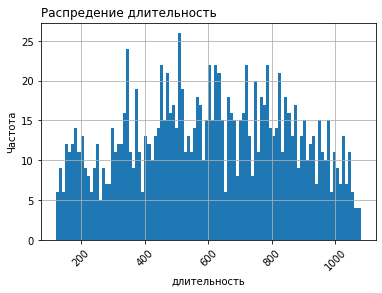

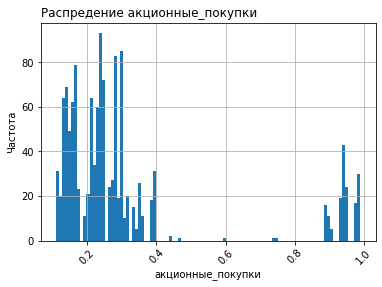

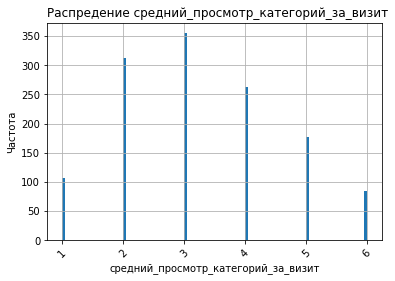

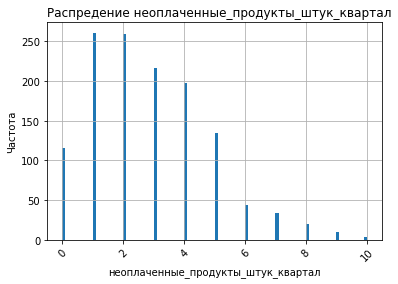

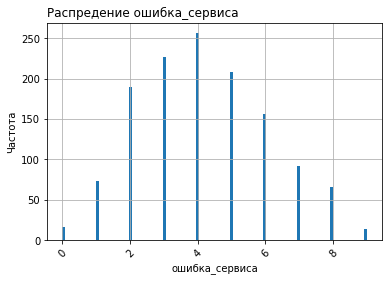

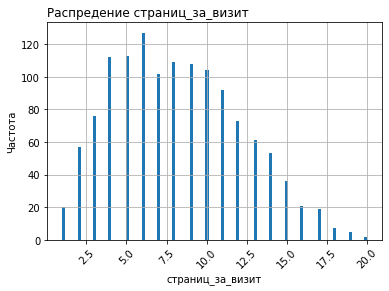

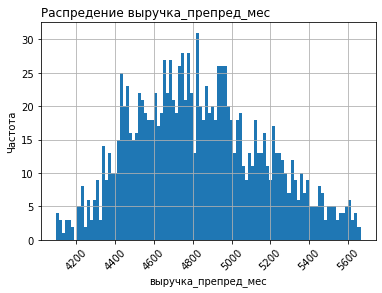

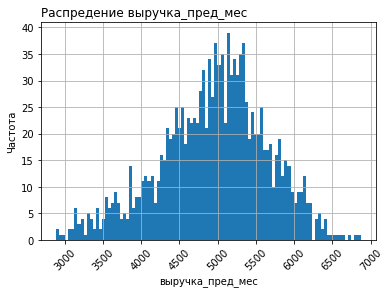

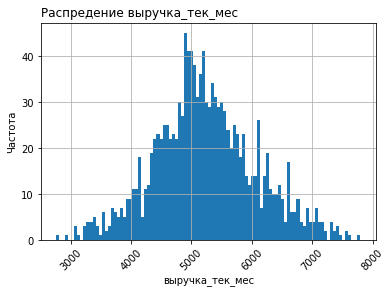

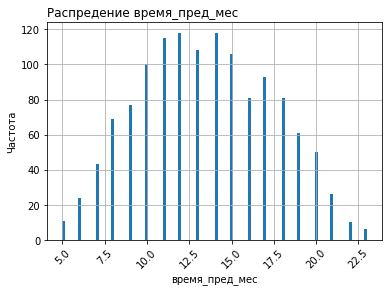

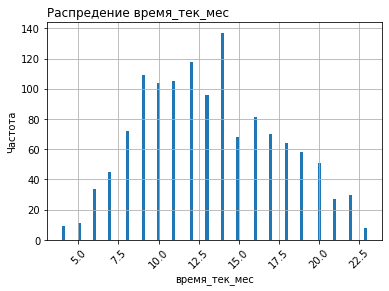



------------- Распределения категориальных признаков -------------


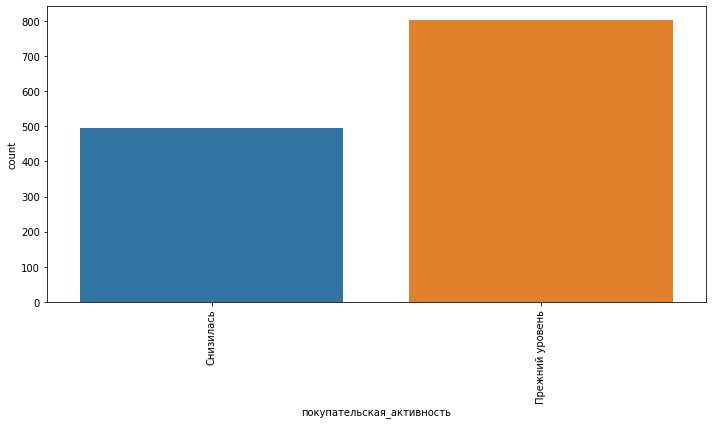

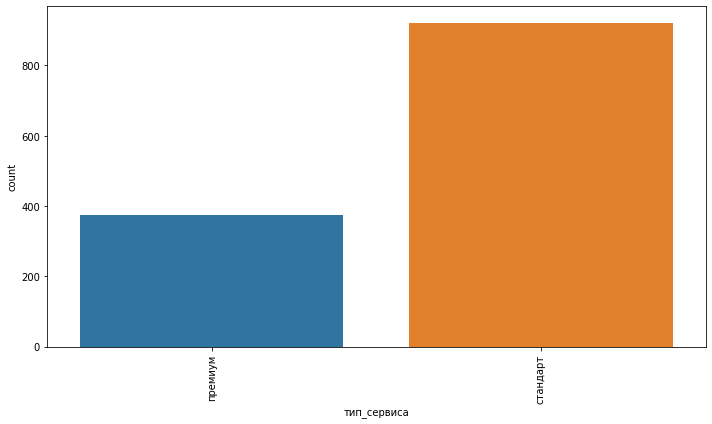

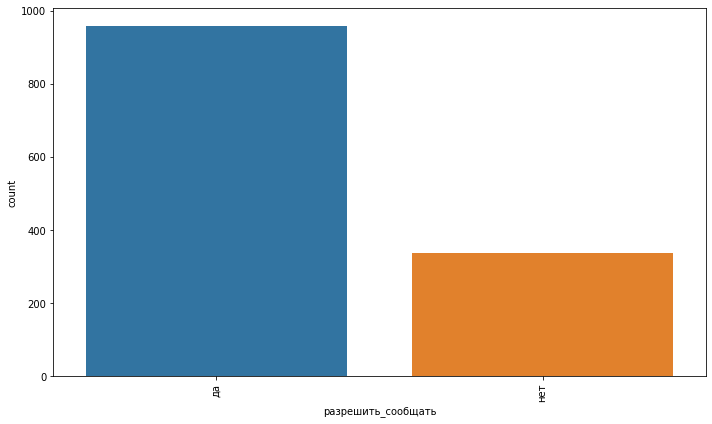

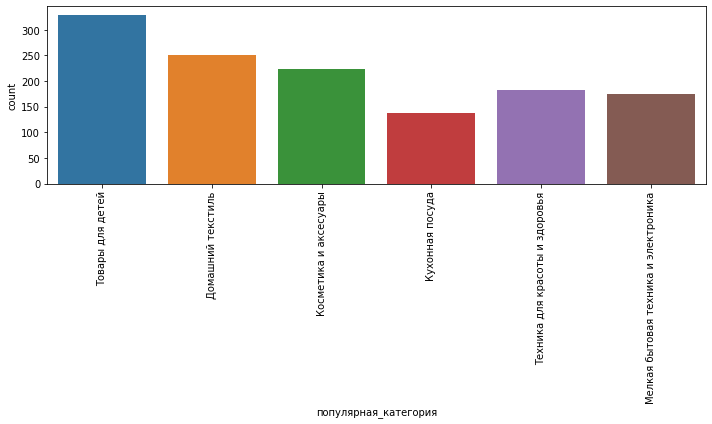

In [261]:
eda(data)

Терепь видим, что выручка распределилась нормально. Также можно отметить позитивный момент, что медианная выручка в компании показывает рост.

In [262]:
data.shape

(1297, 18)

In [263]:
#Разбиваем данные на входящие признаки и целевую переменну.
X = data.drop(['покупательская_активность', 'id'], axis=1)

In [264]:
y = data['покупательская_активность']

Разобьем данные на тренировочные и тестовые. В наших данных по целевому признаку мы не наблюдали большого дисбаланса по целевому признаку, но тем не менее применим стратификацию, чтобы разбиение прошло сбалансированно.

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [266]:
X_train.shape, X_test.shape

((972, 16), (325, 16))

Закодируем целевую переменную.

In [267]:
# экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучим модель 
label_encoder.fit(y_train)

# трансформируем тренировочную и тестовую выборку
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [268]:
pd.DataFrame(y_train_encoded, y_train, columns=['LabelEncoder']).head()

,LabelEncoder
покупательская_активность,
Прежний уровень,0
Снизилась,1
Прежний уровень,0
Прежний уровень,0
Снизилась,1


Перед созданием списков для кодировки еще раз посмотрим на уникальные значения в каждом столбце.

In [269]:
duplicates(data)

Уникальные значения в столбце покупательская_активность:  ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце тип_сервиса:  ['премиум' 'стандарт']
Уникальные значения в столбце разрешить_сообщать:  ['да' 'нет']
Уникальные значения в столбце популярная_категория:  ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Кухонная посуда' 'Техника для красоты и здоровья'
 'Мелкая бытовая техника и электроника']


Видим, что для данных нам надо применить кодировщик Ohe и ранговый кодировщик. 
К числовым данным применим стандартизацию. 

Создадим списки для ohe, ord и scaler.

In [270]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория']

In [271]:
ord_columns = ['тип_сервиса']

In [272]:
num_columns = X.select_dtypes(include=['number']).columns

In [273]:
num_columns

Index(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_препред_мес', 'выручка_пред_мес',
       'выручка_тек_мес', 'время_пред_мес', 'время_тек_мес'],
      dtype='object')

Cоздаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование, SimpleImputer + OH

In [274]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse_output=False))
    ]
    )

Cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование, SimpleImputer + OE.

In [275]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer( strategy='most_frequent')),
        ('ord',  OrdinalEncoder(categories=[['премиум','стандарт']]))]
    ) 

Создаем пайплайн для подготовки данных к обучению.

In [276]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

Cоздаём итоговый пайплайн: подготовка данных и модель.

In [277]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

Создаем список параметров для поиска по сетке для разных моделей.

In [281]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

   # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=42
        )],
        'models__penalty':['l1','l2','elasticnet','none'],
        'models__solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     # словарь для модели SVC()
    {
        'models': [SVC(probability= True, random_state=42)],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


Создаем объект класса случайного поиска по сетке.

В качестве метрики качества выбираем метрику ROC-AUC, поскольку эта метрика универсальна для оценки качества моделей классификации. Ее можно использовать для оценки моделей с различными пороговыми значениями и для сравнения моделей с разными настройками. Интуитивно понятная интерпретация. Площадь под кривой предоставляет легко интерпретируемую метрику качества модели. Возможность показать, насколько корректно упорядочены вероятности. ROC-AUC показывает, как часто положительные объекты имеют меньшую вероятность положительности, чем негативные объекты. Значение ROC-AUC находится в диапазоне от 0 до 1, где 1 указывает на идеальную способность модели различать классы, а 0,5 — на отсутствие классификационной способности, эквивалентной случайному угадыванию.


In [282]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

Обучим модель.

In [283]:
randomized_search.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer...
                                         'models__solver': ['lbfgs',
                                                            'newton-cg',
                                                            'liblinear', 'sag',
                                                            'saga'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__kernel': ['linear', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Выведем паметры лучшей модели, найденной по сетке.

In [284]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                            

Лучшей моделью оказалась логистическая регрессия.

In [285]:
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Метрика лучшей модели на тренировочной выборке: 0.8973924999379544


Проверим работу модели на тестовых значениях.

In [286]:
y_test_pred = randomized_search.predict(X_test) 

In [287]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.890446958754614


**Промежуточный вывод**

Перед разбиением итогового датасета на тренировочную и тестовую выборки было снова проведено исследование данных, удалены данные по трем клиентам с нулевыми продажами в двух месяцах, а также обработано аномальное значение выручки.

Далее данные были разбиты на тренировочные и тестовые. По целевому признаку мы не наблюдали большого дисбаланса по целевому признаку, но тем не менее применили стратификацию, чтобы разбиение прошло сбалансированно.

С помощью LabelEncoder закодировали целевую переменную. Затем подготовили отдельно несколько пайплайнов: для категориальных данных OneHot и ordinal кодирования с учетом применения SimpleImputer. Затем с помощью класса ColumnTransformer создали общий пайплайн для подготовки данных для обучения, куда включили Scaler для стандартизации числовых значений, что очень важно при обучении моделей, чтобы избежать разного масштаба входящих признаков.  

Затем создали итоговый пайплан. Далее список параметров для поиска по сетке (мы использовали случайный поиск по сетке). Создали объект класса RandomSearch, передали параметры и обучили модель. В качестве метрики качества выбрали ROC_AUC за ее универсальность и интуитивно понятную интерпретацию. 

Победила модель логистической регрессии. 

<a id='section_id'></a>
## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [288]:
params = randomized_search.best_params_

In [298]:
params

{'preprocessor__num': StandardScaler(),
 'models__solver': 'saga',
 'models__penalty': 'l1',
 'models__C': 4,
 'models': LogisticRegression(random_state=42)}

In [299]:
#инициализируем модель
model = LogisticRegression(C=4, penalty='l1', random_state=42,
                                    solver='saga')

In [294]:
#применим пайплайн для кодировки входящих признаком на тренировочной и тестовой выбoрке
X_train_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(X_train),
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

In [296]:
X_test_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(X_test),
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())


preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']


model = randomized_search.best_estimator_.named_steps['models']

In [300]:
#обучeние модели
model.fit(X_train_shap, y_train_encoded)

LogisticRegression(C=4, penalty='l1', random_state=42, solver='saga')

In [301]:
#предсказание прогнозов модели
y_test_pred = model.predict(X_test_shap)

In [302]:
#проверка метрики
roc_auc_score(y_test_encoded, y_test_pred)

0.8929345209436687

In [303]:
#Значения SHAP для модели черного ящика
explainer = shap.LinearExplainer(model, X_train_shap) #feature_names = data_preprocessor.get_feature_names_out())

In [304]:
shap_values = explainer(X_test_shap)

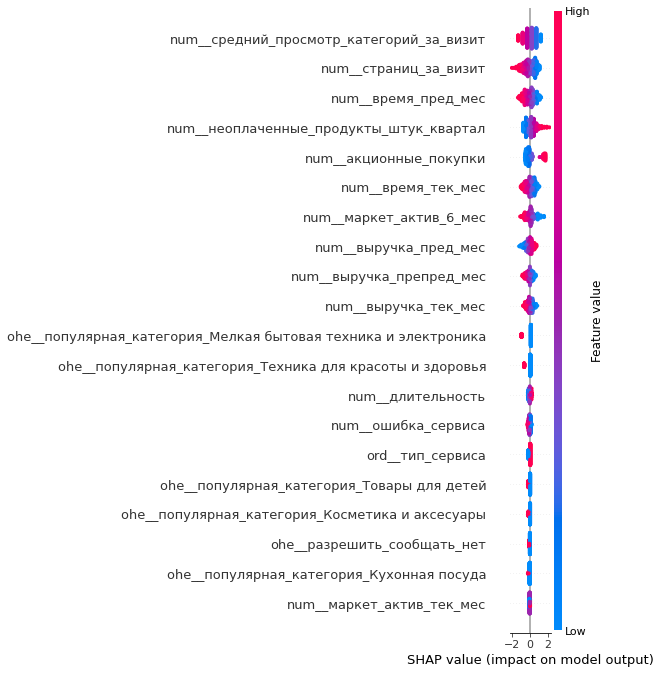

In [306]:
#суммарная оценка вклада каждого входящего признака для предсказания модели
shap.summary_plot(shap_values, X_test_shap)

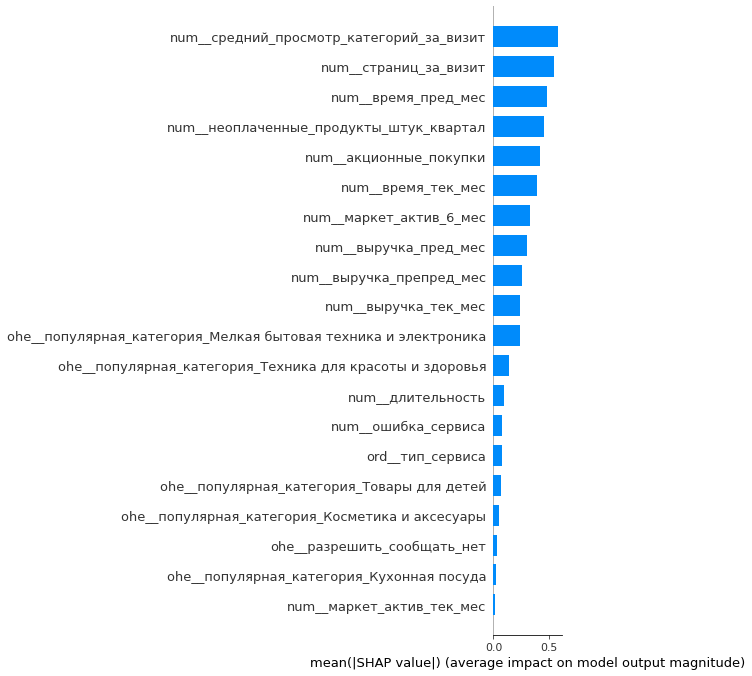

In [307]:
shap.summary_plot(shap_values, X_test_shap, plot_type='bar')

**Промежуточный вывод**


По графикам видим, что самый большой вклад в решение классификатора вносит переменная 'средний_просмотр_категорий_за_визит' и 'страниц_за_визит' (на этих же фичах видели высокую корреляцию при выводе матрицы phik). Чем больше просмотров, тем выше покупательная способность и наоборот, при снижении значения переменной, целевая переменная более склона к положительному классу 1 (снижение покупательской активности). Наименьший вклад вносит переменная 'маркет_актив_тек_месяц' — количество маркетинговых коммуникаций в текущем месяце и популярная категория кухонная посуда. 

<a id='section_id7'></a>
## Сегментация покупателей

Выполним сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей. Для начала объединим итоговую таблицу data с датасетом о прибыльности по каждому клиенту за последние три месяца.

In [308]:
data = data.merge(money_3month, on='id')

Выделим клиентов в сегмент клиентов, у которых вероятность снижения покупательной активности более 70% и при этом они приносят высокую прибыль. С этим сегментом следует отдельно поработать, чтобы снизить вероятность их оттока.

Добавим в данные столбец вероятности принадлежности к классу 1 (снизилась покупательная активность).

In [312]:
X_test_segment = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(X),
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

In [313]:
model.predict_proba(X_test_segment)

array([[0.0932442 , 0.9067558 ],
       [0.60005387, 0.39994613],
       [0.19498757, 0.80501243],
       ...,
       [0.75553881, 0.24446119],
       [0.86213693, 0.13786307],
       [0.40223023, 0.59776977]])

In [315]:
data['вероятность_снижения'] = model.predict_proba(X_test_segment)[:, 1]

In [316]:
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препред_мес,выручка_пред_мес,выручка_тек_мес,время_пред_мес,время_тек_мес,прибыль,вероятность_снижения
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,4.16,0.906756
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,3.13,0.399946
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,4.87,0.805012
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,4.21,0.966714
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,3.95,0.607047


In [317]:
data.прибыль.describe()

count    1297.000000
mean        3.997610
std         1.010813
min         0.860000
25%         3.300000
50%         4.040000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Обозначим два сегмента - исследуемый сегмент и остальные сегменты.

Выведем график рассеивания для выбранного сегмента. 

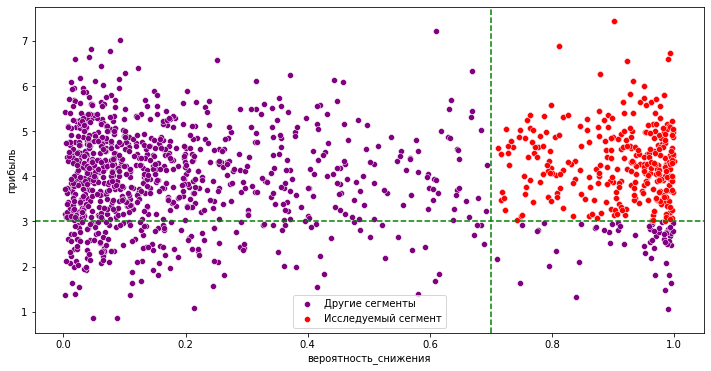

In [325]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='вероятность_снижения', y='прибыль', 
               label='Другие сегменты', color='purple')

sns.scatterplot(data=data.query('вероятность_снижения > 0.7 & прибыль > 3'), x='вероятность_снижения', y='прибыль', 
               label='Исследуемый сегмент', color='red')
plt.legend()
plt.axvline(x=0.7, color='green', linestyle='--')
plt.axhline(y=3, color='green', linestyle='--')
plt.show()

In [326]:
study_segment = data.query('вероятность_снижения > 0.7 & прибыль > 3')

In [328]:
others_segment = data.query('вероятность_снижения <= 0.7')

Построим графики распределения выручки для каждого сегмента.

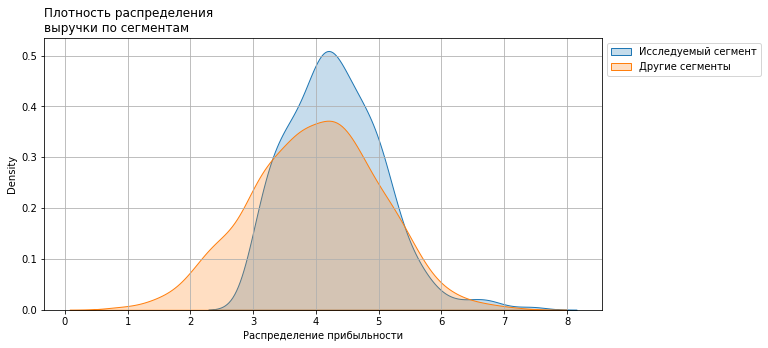

In [329]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(study_segment.прибыль, label = 'Исследуемый сегмент', fill=True)
sns.kdeplot(others_segment.прибыль, label = 'Другие сегменты', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nвыручки по сегментам', loc = 'left') 
plt.xlabel('Распределение прибыльности') 


plt.show()

Медианная прибыль практически одинаковая. У других сегментов более длинный и тяжелый хвост слева, но это логично. Мы брали всех остальных без фильтра по прибыли. Из этого можно сделать вывод, что ценовая политика по отношению к исследуемому сегменту не отличается от других.

Изучим доли акционных покупок в сегментах.

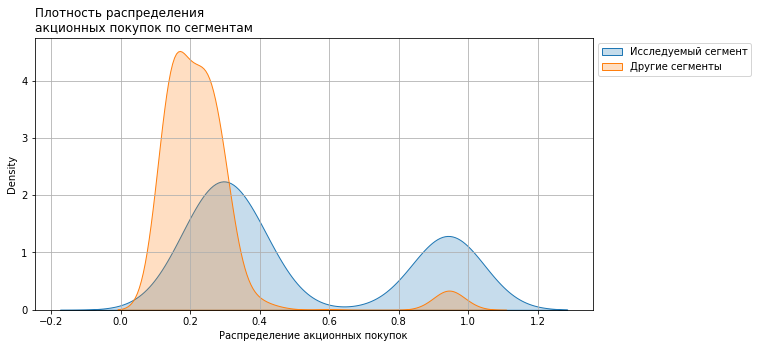

In [347]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(study_segment.акционные_покупки, label = 'Исследуемый сегмент', fill=True)
sns.kdeplot(others_segment.акционные_покупки, label = 'Другие сегменты', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nакционных покупок по сегментам', loc = 'left') 
plt.xlabel('Распределение акционных покупок') 


plt.show()

По распределению видим, что у сегмента, где активность не снижается, преобладает доля акционных покупок в районе 20% и небольшая доля в районе 80%. В исследуемом же сегменте акционные покупки преобладают в районе 30% и 90%. Т.е. можно группы разбить еще на два кластера.  

Посмотрим какие категории товаров самые популярные.

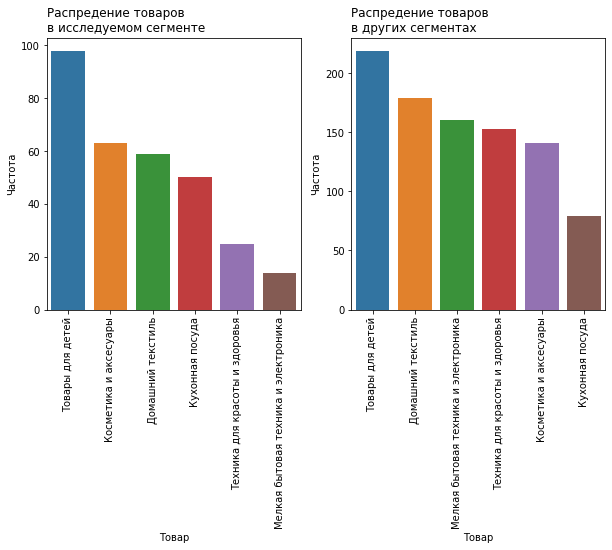

In [348]:
plt.figure(figsize=(10,5))
plt.subplot(121) 
sns.countplot(data=study_segment, x='популярная_категория', order=study_segment['популярная_категория'].value_counts().index)
plt.title('Распредение товаров \nв исследуемом сегменте', loc = 'left') 
plt.xlabel('Товар') 
plt.ylabel('Частота') 
plt.xticks(rotation=90)

plt.subplot(122) 
sns.countplot(data=others_segment, x='популярная_категория', order=others_segment['популярная_категория'].value_counts().index)
plt.title('Распредение товаров \nв других сегментах', loc = 'left') 
plt.xlabel('Товар') 
plt.ylabel('Частота') 
plt.xticks(rotation=90)


plt.show()


В обоих группах самый популярный товар - товары для детей. В группе, где снизилась активность второй по популярности товар - косметика и домашний текстиль. Следовательно следует этой группе клиентов делать персонализированные предложения по этим категориям товаров.

Ранее матрица корреляции и исследование важности признаков модели показали, что снижение активности очень зависит от поведения клиента на сайте. Попробуем посмотреть параметры работы сайта. Например, проверим ошибку сервиса. Сколько было ошибок сервиса в каждой группе.

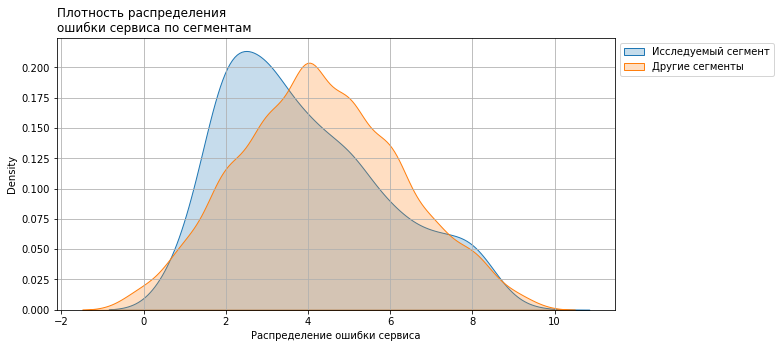

In [349]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(study_segment.ошибка_сервиса, label = 'Исследуемый сегмент', fill=True)
sns.kdeplot(others_segment.ошибка_сервиса, label = 'Другие сегменты', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nошибки сервиса по сегментам', loc = 'left') 
plt.xlabel('Распределение ошибки сервиса') 


plt.show()

Видим, что ошибка сервиса не особо влияет на снижение активности. 

Проверим маркетинговую активность.

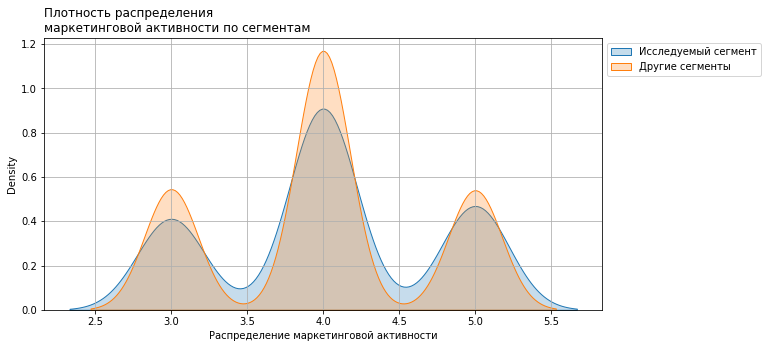

In [352]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(study_segment.маркет_актив_тек_мес, label = 'Исследуемый сегмент', fill=True)
sns.kdeplot(others_segment.маркет_актив_тек_мес, label = 'Другие сегменты', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nмаркетинговой активности по сегментам', loc = 'left') 
plt.xlabel('Распределение маркетинговой активности') 


plt.show()

Маркетинговые кампании в двух сегментах не отличаются.

Проверим количество страниц за визит.

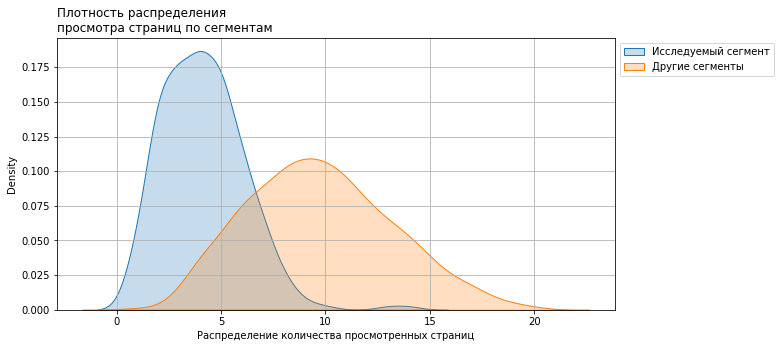

In [351]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(study_segment.страниц_за_визит, label = 'Исследуемый сегмент', fill=True)
sns.kdeplot(others_segment.страниц_за_визит, label = 'Другие сегменты', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nпросмотра страниц по сегментам', loc = 'left') 
plt.xlabel('Распределение количества просмотренных страниц') 


plt.show()

Видим, что в исследуемом сегменте среднее количество просмотренных страниц 4, а в других 10. Этот же признак сильно коррелировал в матрице корреляций с целевой переменной. И модель выбрала это признак за один из самых важных.

Неоплаченные продукты в корзине.

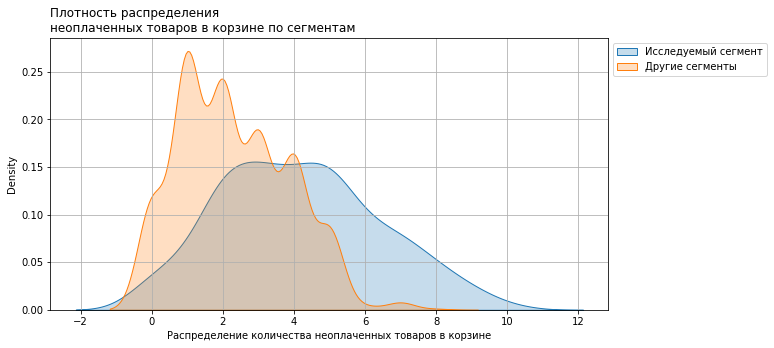

In [353]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.kdeplot(study_segment.неоплаченные_продукты_штук_квартал, label = 'Исследуемый сегмент', fill=True)
sns.kdeplot(others_segment.неоплаченные_продукты_штук_квартал, label = 'Другие сегменты', fill=True)    
plt.grid(True) 
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) 
plt.title('Плотность распределения\nнеоплаченных товаров в корзине по сегментам', loc = 'left') 
plt.xlabel('Распределение количества неоплаченных товаров в корзине') 


plt.show()

Видим, что в исследуемом сегменте среднее количество неоплаченных товаров 4, а в других 2. Модель также выбрала это признак за один из самых важных.

**Промежуточный вывод**

Выделили сегмент для изучения. Решили сделать фокус на самой прибыльной группе с большой вероятностью оттока, чтобы изучить их поведение. Пришли к выводу, что в компании все в порядке с ценовой политикой. Цены не влияют на снижение активности клиентов. Провели проверку самых популярных товаров. Увидели, что клиенты в оттоке интересуются детскими товарами, текстилем и косметикой. По распределению акционных покупок заметили, что у сегмента, где активность не снижается, преобладает доля акционных покупок в районе 20% и небольшая доля в районе 80%. В исследуемом же сегменте акционные покупки преобладают в районе 30% и 90%. Также по признаку акционных товаров можно группы разбить еще на два кластера. Выяснили, что ошибка сервиса не особо влияет на снижение активности. То же самое можно сказать и про маркетинговую активность. Но зато заметили,в исследуемом сегменте среднее количество просмотренных страниц 4, а в других 10. Этот же признак сильно коррелировал в матрице корреляций с целевой переменной. И модель выбрала этот признак за один из самых важных. Такая же картина и с неоплаченными товарами в корзине, в исследуемом сегменте среднее количество неоплаченных товаров 4, а в других 2. Модель также выбрала это признак за один из самых важных.


<a id='section_id8'></a>
## Общий вывод 

Была поставлена задача исследовать продажи интернет-магазина. В компании повысился отток клиентов при том, что компания занимает хорошую нишу на рынке, имеет большой охват. 

Для исследования получили несколько датасетов:
- данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении
- о выручке, которую получает магазин с покупателя 
- о времени (в минутах), которое покупатель провёл на сайте в течение периода
- о среднемесячной прибыли продавца за последние 3 месяца

При выводе описательной статистики и изучения визуализаций увидели, что в данных нет аномальных значений. Заметили, что есть группа клиентов, с коротыми было не очень много маркетинговых коммуникаций за последние 6 месяцев (менее трех). В основном было от 3 до 6 коммуникаций. За текущий месяц было стабильно 3, 4 или 5 коммуникаций. Длительность пользования клиентами сервиса распределена практически нормально, также заметно, что данные можно дискретизировать. Акционные покупки можно разделить на несколько категорий, но основная масса была в промежутке 0.1-0.4. Средний просмотр также явно распределяется в несколько категорий, доминирует 3 просмотра. Похожая картина и с неоплаченными продуктами в корзине. Доминирует значение 1. Ошибки сервиса распределены нормально, преобладает 4 ошибки. Просмотр страниц за визит - нормальное распределение, доминирует 6 страниц. При изучении категориальных признаков заметили, что основная масса не снижает покупательную активность, но тем не менее видим, что у многих она снизилась. Преобладает тип сервиса стандарт. Больше клиентов дают согласие на рассылку. В данных преобладает категория товаров для детей и домашний текстиль.

Перед разбиением итогового датасета на тренировочную и тестовую выборки было снова проведено исследование данных, удалены данные по трем клиентам с нулевыми продажами в двух месяцах, а также обработано аномальное значение выручки.

Далее данные были разбиты на тренировочные и тестовые. По целевому признаку мы не наблюдали большого дисбаланса по целевому признаку, но тем не менее применили стратификацию, чтобы разбиение прошло сбалансированно.

С помощью LabelEncoder закодировали целевую переменную. Затем подготовили отдельно несколько пайплайнов: для категориальных данных OneHot и ordinal кодирования с учетом применения SimpleImputer. Затем с помощью класса ColumnTransformer создали общий пайплайн для подготовки данных для обучения, куда включили Scaler для стандартизации числовых значений, что очень важно при обучении моделей, чтобы избежать разного масштаба входящих признаков.  

Затем создали итоговый пайплан. Далее список параметров для поиска по сетке (мы использовали случайный поиск по сетке). Создали объект класса RandomSearch, передали параметры и обучили модель. В качестве метрики качества выбрали ROC_AUC за ее универсальность и интуитивно понятную интерпретацию. 

Победила модель логистической регрессии. 

При изучении вклада каждой переменной в прогноз снижения активностм клиентов увидели, что самый большой вклад в решение классификатора вносит переменная 'средний_просмотр_категорий_за_визит' и 'страниц_за_визит' (на этих же фичах видели высокую корреляцию при выводе матрицы phik). Чем больше просмотров, тем выше покупательная способность и наоборот, при снижении значения переменной, целевая переменная более склона к положительному классу 1 (снижение покупательской активности). Наименьший вклад вносит переменная 'маркет_актив_тек_месяц' — количество маркетинговых коммуникаций в текущем месяце и популярная категория кухонная посуда. 


Выделили сегмент для изучения. Решили сделать фокус на самой прибыльной группе с большой вероятностью оттока, чтобы изучить их поведение. Пришли к выводу, что в компании все в порядке с ценовой политикой. Цены не влияют на снижение активности клиентов. Провели проверку самых популярных товаров. Увидели, что клиенты в оттоке интересуются детскими товарами, текстилем и косметикой. По распределению акционных покупок заметили, что у сегмента, где активность не снижается, преобладает доля акционных покупок в районе 20% и небольшая доля в районе 80%. В исследуемом же сегменте акционные покупки преобладают в районе 30% и 90%. Также по признаку акционных товаров можно группы разбить еще на два кластера. Выяснили, что ошибка сервиса не особо влияет на снижение активности. То же самое можно сказать и про маркетинговую активность. Но зато заметили,в исследуемом сегменте среднее количество просмотренных страниц 4, а в других 10. Этот же признак сильно коррелировал в матрице корреляций с целевой переменной. И модель выбрала этот признак за один из самых важных. Такая же картина и с неоплаченными товарами в корзине, в исследуемом сегменте среднее количество неоплаченных товаров 4, а в других 2. Модель также выбрала это признак за один из самых важных.

**Рекомендации для бизнеса**

В компании все в порядке с ценовой политикой.  Было замечено, что клиенты в оттоке предпочитают товары для детей, текстиль и косметику. По этим категориям товаров можно предусмотреть отдельные акции. По графикам распределения акционных покупок также увидели, что клиенты из исследуемого сегмента все-таки покупают много акционных товаров. Возможно стоит для них чаще проводить такие акции, а лучше акции с учетом популярных для них товаров. 

Модель показала, что на отток клиентов очень влияет просмотры клентов товаров на сайте. Возможно следует поработать с сайтом, сделать более красивые и заманчивые картинки, чтобы побуждать клиентов 'смотреть глубже', улучшить визуальную красоту и функциональность сайта. Кроме того возможно предусмотреть какие-то побуждающие действия по товарам в корзине. Например, 'Вы почему-то не оплачиваете выбранные товары. Может Вы хотите рассрочку?'
